In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color='red' size='6'>ch12. 데이터프레임과 시리즈(pandas)</font></b>

# 1절 판다스 패키지
- 데이터 분석을 위해서 반드시 알아야 할 패키지. 넘파이 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임(excel의 스프레드시트)을 제공
- 판다스의 장점 : 파일 I/O, 부분 데이터 추출, 크기변경, 데이터 변경|분할|병합|정렬|분할, 결측치 처리, 피벗과 언피벗(와이드포맷과 롱포맷)에 용이
- [Pandas API referance](https://pandas.pydata.org/docs/reference/index.html)

In [6]:
import pandas as pd

In [13]:
data = pd.read_csv('data/ch09_member4.csv')
display(data)

,name,age,email,address
0,홍길동,20,a@hong.com,서울시 관악구
1,신길동,30,b@hong.com,서울시 관악구
2,김길동,40,c@hong.com,서울시 관악구


In [22]:
data = pd.read_csv('data/ch09_member1.csv',header=None,names=['이름','나이','메일','주소'])
data

,이름,나이,메일,주소
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


In [24]:
data = pd.read_json('data/ch09_member1.json')
data

,name,age,email,address
0,홍길동,22,a@a.com,서울
1,신길동,32,a@a.com,서울
2,김길동,42,a@a.com,서울


# 2절 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [36]:
d = {'kor':[100,90], 'mat':[95,99]}
df = pd.DataFrame(d)
df

,kor,mat
0,100,95
1,90,99


In [37]:
df.to_dict()

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [38]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [45]:
d = [{'kor':100, 'mat':95}, {'kor':90,'mat':99}]
df = pd.DataFrame(d)
df

,kor,mat
0,100,95
1,90,99


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [50]:
d = [{'kor':100, 'mat':100}, {'kor':90,'mat':91},{'kor':93, 'math':90}]
df = pd.DataFrame(d) # 결측치는 실수형(float64). 정수형변환 불가
df

,kor,mat,math
0,100,100.0,NaN
1,90,91.0,NaN
2,93,NaN,90.0


## 2.2 리스트를 이용해서 데이터프레임 만들기

In [51]:
title = ['책1','책2','책3']
price = [15000,18000,10000]
df = pd.DataFrame(data={'title':title, 'price':price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,10000


In [6]:
import pandas as pd
l = [['책1','책2','책3'],[1500,18000,10000]]
df = pd.DataFrame(l)
df

,0,1,2
0,책1,책2,책3
1,1500,18000,10000


In [57]:
l = [['책1',15000],['책2',18000],['책3',10000]]
df = pd.DataFrame(l, columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


## 2.3 read_csv

In [86]:
df = pd.read_csv(f'C:/ai_x/download/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_세종_202503.csv', 
                 low_memory=False, # 데이터 용량이 클 경우 기입
                 nrows=30 # 처음 30행만 
                )
df.shape

(30, 39)

In [88]:
pd.options.display.max_columns = 39 #기본값:20
display(df)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,일반의원,36,세종특별자치시,36110,세종특별자치시,36110525,해밀동,3611011600,해밀동,3611011600200050002,2,산,5,2.0,세종특별자치시 세종특별자치시 해밀동 산5-2,361103352828,세종특별자치시 세종특별자치시 해밀3로,43,NaN,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585
1,MA010120220800005576,우보설렁탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,한식 일반 음식점업,36,세종특별자치시,36110,세종특별자치시,36110250,조치원읍,3611025023,조치원읍,3611025023100230051,1,대지,23,51.0,세종특별자치시 세종특별자치시 조치원읍 평리 23-51,361103258043,세종특별자치시 세종특별자치시 조치원읍 문화로,24,NaN,4473025023100230051035586,NaN,세종특별자치시 세종특별자치시 조치원읍 문화로 24,339885.0,30025,NaN,NaN,NaN,127.301068,36.603770
2,MA010120220800006182,메이빈,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,36,세종특별자치시,36110,세종특별자치시,36110560,보람동,3611010300,보람동,3611010300107050000,1,대지,705,NaN,세종특별자치시 세종특별자치시 보람동 705,361102348105,세종특별자치시 세종특별자치시 시청대로,127,NaN,3611010300106640011000001,강남프라자,세종특별자치시 세종특별자치시 시청대로 127,339008.0,30151,NaN,3.0,NaN,127.286081,36.479674
3,MA010120220800008970,명품동태탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,한식 일반 음식점업,36,세종특별자치시,36110,세종특별자치시,36110350,장군면,3611035024,장군면,3611035024103040008,1,대지,304,8.0,세종특별자치시 세종특별자치시 장군면 봉안리 304-8,361104574659,세종특별자치시 세종특별자치시 장군면 월현윗길,29,NaN,3611035024103040008000001,행복마을,세종특별자치시 세종특별자치시 장군면 월현윗길 29,339914.0,30055,NaN,1.0,NaN,127.223073,36.501346
4,MA010120220800024017,컴119,NaN,S2,수리·개인,S201,컴퓨터 수리,S20101,컴퓨터/노트북/프린터 수리업,S95110,컴퓨터 및 주변 기기 수리업,36,세종특별자치시,36110,세종특별자치시,36110510,한솔동,3611010600,한솔동,3611010600109670000,1,대지,967,NaN,세종특별자치시 세종특별자치시 한솔동 967,361103258060,세종특별자치시 세종특별자치시 노을3로,99,NaN,3611010600102180000000001,골든타원,세종특별자치시 세종특별자치시 노을3로 99,339014.0,30130,NaN,2.0,NaN,127.253843,36.479828
5,MA010120220800047182,포지션,NaN,G2,소매,G216,안경·정밀기기 소매,G21603,사진기/기타 광학기기 소매업,G47829,기타 광학 및 정밀 기기 소매업,36,세종특별자치시,36110,세종특별자치시,36110340,금남면,3611034022,금남면,3611034022102850004,1,대지,285,4.0,세종특별자치시 세종특별자치시 금남면 발산리 285-4,361104574172,세종특별자치시 세종특별자치시 금남면 발산1길,67,NaN,3611034022102850004000001,NaN,세종특별자치시 세종특별자치시 금남면 발산1길 67,339833.0,30083,NaN,NaN,NaN,127.283364,36.456746
6,MA010120220800046344,이화공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,36,세종특별자치시,36110,세종특별자치시,36110518,나성동,3611010700,나성동,3611010700108530000,1,대지,853,NaN,세종특별자치시 세종특별자치시 나성동 853,361103352717,세종특별자치시 세종특별자치시 어울누리로,67,NaN,3611010700106840001000001,나릿재마을2단지,세종특별자치시 세종특별자치시 어울누리로 67,339003.0,30128,NaN,NaN,NaN,127.265373,36.487283
7,MA010120220800046670,김가네칼국수,NaN,I2,음식,I201,한식,I20105,국수/칼국수,I56112,한식 면 요리 전문점,36,세종특별자치시,36110,세종특별자치시,36110250,조치원읍,3611025029,조치원읍,3611025029102660002,1,대지,266,2.0,세종특별자치시 세종특별자치시 조치원읍 신흥리 266-2,361104574510,세종특별자치시 세종특별자치시 조치원읍 큰말2길,3,NaN,4473025029102660002000001,NaN,세종특별자치시 세종특별자치시 조치원읍 큰말2길 3,339807.0,30030,NaN,NaN,NaN,127.289301,36.595365
8,MA010120220800048962,굿모닝보청기,NaN,G2,소매,G215,의약·화장품 소매,G21502,의료기기 소매업,G47812,의료용 기구 소매업,36,세종특별자치시,36110,세종특별자치시,36110250,조치원읍,3611025021,조치원읍,3611025021100010014,1,대지,1,14.0,세종특별자치시 세종특별자치시 조치원읍 원리 1-14,361104574472,세종특별자치시 세종특별자치시 조치원읍 조치원7길,6,NaN,4473025021100010014037459,NaN,세종특별자치시 세종특별자치시 조치원읍 조치원7길 6,339883.0,30024,NaN,1.0,NaN,127.300613,36.601726
9,MA010120220800042909,청년피자,조치원점,I2,음식,I210,기타 간이,I21003,피자,I56192,피자; 햄버거; 샌드위치 및 유사 음식점업,36,세종특별자치시,36110,세종특별자치시,36110250,조치원읍,3611025028,조치원읍,3611025028102670008,1,대지,267,8.0,세종특별자치시 세종특별자치시 조치원읍 침산리 267-8,361104574536,세종특별자치시 세종특별자치시 조치원읍 행복10길,9,NaN,3611025028102670008000001,주건축물제,세종특별자치시 세종특별자치시 조치원읍 행복10길 9,339887.0,30021,NaN,2.0,NaN,127.291133,36.604147


In [94]:
df.head(2).T

,0,1
상가업소번호,MA010120220700019175,MA010120220800005576
상호명,세종수이비인후과의원,우보설렁탕
지점명,NaN,NaN
상권업종대분류코드,Q1,I2
상권업종대분류명,보건의료,음식
상권업종중분류코드,Q102,I201
상권업종중분류명,의원,한식
상권업종소분류코드,Q10201,I20102
상권업종소분류명,내과/소아과 의원,국/탕/찌개류
표준산업분류코드,Q86201,I56111


In [96]:
# (1) CSV 파일 불러오기
# encoding='utf-8', sep=',' csv파일의 첫번째 줄을 header, #이 있는 줄도 데이터로 인식
member = pd.read_csv('data/ch11_member.csv')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [97]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [108]:
# 형변환 Age열: int64 -> int16
import numpy as np 
member['Age'] = member['Age'].astype(np.int16)
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int16 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int16(1), object(4)
memory usage: 332.0+ bytes


In [120]:
member['Birth'] = member['Birth'].astype('datetime64[ns]')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      datetime64[ns]
 5   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(3)
memory usage: 380.0+ bytes


In [118]:
member['Birth_to'] = pd.to_datetime(member['Birth']) #astype()함수보다 안전한 형변환
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      datetime64[ns]
 5   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(3)
memory usage: 380.0+ bytes


In [121]:
# (2) 특정행 제외하고 csv파일읽기
member = pd.read_csv('data/ch11_membercp949.csv',
                    encoding='cp949',
                    skiprows=[1, 6]) # 1,6번째 행은 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [131]:
# (3) 주석(#)제외, datetime형 필드 지정하여 읽기
member = pd.read_csv('data/ch11_membertab.csv', 
                     sep='\t',
                     comment='#',
                     parse_dates=['Birth']) # astype할 수 있는 데이터를 알아서 해줌
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [136]:
# (4) sep'|', 상위5행만 읽어오기
member = pd.read_csv('data/ch11_membersep.csv',
                     sep='|', 
                     nrows=5)
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 2.4 패키지에서 가져오기 : iris 데이터
- iris 가져오기 방법 1 : sklearn (머신러닝 패키지)
- iris 가져오기 방법 2 : statsmodels (R 데이터)
- iris 가져오기 방법 3 : seaborn (시각화 패키지)
### iris 가져오기 방법 1 : sklearn (머신러닝 패키지)

In [142]:
from sklearn import datasets
# sklearn : 머신러닝 패키지(전처라함수, 머신러닝, 성능평가를 위한 함수, 학습데이터셋)
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [143]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [147]:
iris.data # 독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [148]:
iris.feature_names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [154]:
# 데이터 프레임에서 열이름
columns = [ col[:-5] for col in iris.feature_names] + ['species']
columns

['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

In [171]:
target =  iris.target_names[iris.target]

In [172]:
# 독립변수
data = iris.data
data.shape, target.shape

((150, 4), (150,))

In [174]:
pd.DataFrame(data=np.hstack((data,target.reshape(-1,1) ) ), columns=columns)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### iris 가져오기 방법 2 : statsmodels (R 데이터)
- R언어에 있는 유명한 데이터셋을 가져오는 함수

In [4]:
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris', 
                            package='datasets', #R의 datasets 패키지에서 가져옴
                            cache=True) #한번 다운로드한 데이터셋을 PC에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [8]:
iris = iris_dataset.data
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [9]:
iris['Sepal.Length']
# iris.Sepal.Length 열이름에 '.', ' '(space)가 있으면 iris.Sepal.Length 접근불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [18]:
iris.columns =  [col.replace('.','_').lower() for col in iris.columns ]
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### iris 가져오기 방법 3 : seaborn (시각화 패키지)

In [24]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [27]:
# 데이터 프레임을 csv파일로 저장하기
iris.to_csv('data/ch11_iris.csv', index=False) #인덱스를 제외하고 파일 출력

In [28]:
import pandas as pd
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [30]:
# 데이터프레임을 압축파일로 저장하기(.zip .gz .bz2)
iris.to_csv('data/ch11_iris.zip', compression='infer', index=False)

In [31]:
load_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
load_iris = pd.read_csv('data/ch11_iris.zip', compression='infer')
load_iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


# 3절 이름(열, 행) 지정하기

## 3.1 열 이름 지정하기

In [99]:
member = pd.read_csv('data/ch11_member.csv', 
                     comment='#',
                     parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [100]:
member.columns = ['이름','나이','메일','주소','생년월일']
member.columns.name = None
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정

In [44]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [51]:
member.index = range(11,16)
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [53]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [66]:
member.columns.name = None
member.index.name = None
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [62]:
member.loc['남', '이름']

'홍길남'

In [68]:
# 특정을 index로 setting
# member를 수정하는 방법 1.할당 2.inplace 매개변수에 True (default : False)
member1 = member.set_index('이름') # 이름열이 index로 setting
member1

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [90]:
member.set_index('이름', inplace=True) # 이름열을 index로 바꿈
member

,index,나이,메일,주소,생년월일
이름,,,,,
홍길동,0,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,1,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,2,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,3,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,4,23,mid@hong.com,부산시 중구,1999-01-30


In [91]:
member.reset_index(inplace=True)
member

,이름,index,나이,메일,주소,생년월일
0,홍길동,0,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,1,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,2,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,3,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,4,23,mid@hong.com,부산시 중구,1999-01-30


In [93]:
# 시리즈가 날짜형일 경우
member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int64

In [97]:
member['생년월일'].dt.weekday # 월 화 수 목 금 토 일
                             # 0  1 2  3  4 5  6

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int64

 ## 3.3 레벨 이름 지정하기

In [103]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                  ['이름','나이','메일','주소','생년월일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [106]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [108]:
member.loc[('좌우','동'),'기본정보']

소분류
이름              홍길동
나이               20
메일    hong@hong.com
Name: (좌우, 동), dtype: object

# 4절 부분 데이터 조회

In [117]:
member = pd.read_csv('data/ch11_member.csv',comment='#', parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 열 조회

In [118]:
member['Name'] # == member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [120]:
member[['Name','Email']]

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름과 열이름으로 조회
    * 행이름과 열이름 자리에 list    EX ) ['Name', 'Email']
    * 행이름과 열이름 자리에 슬라이싱  from:to => from부터 to까지 **(to 앞까지 아님)**
    * , 열이름 생략시 모든 열

In [121]:
member.loc[0:2]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [122]:
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [124]:
# 동행부터 남행
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [126]:
# 동행부터 남행, 'Name','Age','Email'
member.loc['동':'남','Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [130]:
# 동행과 남행, 'Name','Age','Email'
member.loc[['동','남'],['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [140]:
# loc을 이용한 특정 열 조회
member.loc[:,['Name','Address']]

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [144]:
member.loc['동'] # 특정행이나 특정열만 access => 결과가 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [145]:
member.loc['동':'동'] # 슬라이싱의 경우 결과가 2차원 => 결과가 데이터프레임

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 4.3 iloc을 이용한 조회
- df.loc[행번호, 열번호] : 행번호와 열번호로 조회
    * 행번호와 열번호 자리에 list    EX ) [0,2]
    * 행번호와 열번호 자리에 슬라이싱  from:to:by => from부터 by씩 증가하며 to앞까지 
    * , 열번호 생략시 모든 열

In [147]:
# 0번째~2번째 행, 모든 열
member.iloc[0:3,]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [149]:
member.iloc[0] 

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [150]:
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [155]:
# 모든 행의 마지막 열만 데이트프레임으로 추출
member.iloc[:,-1:]

,Birth
동,1999-01-01
서,1999-12-01
남,1999-11-01
북,1999-05-01
중,1999-01-30


In [156]:
# 0번째, 3번째행, 0번째, 3번째, 4번째 열
member.iloc[0:4:3, [0,3,4]]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
북,홍길북,서울시 관악구,1999-05-01


## 4.4 조건으로 조회
- df[조건] : 조건에 멎나느 행(모든 열)
- df.loc[조건, 열이름] 또는 df[조건][열이름] : 조건에 맞는 행의 특정 열

In [161]:
member.Age > 22

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [165]:
# Age가 22보다 큰 데이터 셋
member[member.Age>22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [168]:
# Age가 22보다 큰 데이터 셋 중 Name과 Age만 출력
member[member.Age>22][['Name','Age']]

,Name,Age
서,홍길서,30
중,홍길중,23


In [171]:
member.loc[member.Age>22,['Name','Age']]

,Name,Age
서,홍길서,30
중,홍길중,23


In [175]:
address1 = '서울시 강동구'
address2 = '부산시 중구'
print(address1.startswith('서울시'))
print(address2.startswith('서울시'))
print(address1.find('강동구')!=-1)
print(address2.count('강동구')>0)

True
False
True
False


In [180]:
# Address가 '서울시'로 시작하는 행
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [184]:
# Address에 '강동구'가 포함된 행
member[member.Address.str.count('강동구')>0]
member[member.Address.str.find('강동구')!=-1]
member[member.Address.str.contains('강동구')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [190]:
# Address에 '강동구'가 포함된 'Name','Age' 열 조회
member[member.Address.str.contains('강동구')][['Name','Age']]

,Name,Age
동,홍길동,20
남,홍길남,21


In [191]:
member[member.Birth.dt.year==1999]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


※ 데이터 프레임의 부분 데이터 조회 방법
- df[열이름] - 특정 열 모든 행 조회
- df[조건] - 조건에 맞는 열 모든 행 조회
- df.loc[행이름,열이름] : 이름조회, 조건(행이름 자리)으로 조회 가능

## 4.5 연습문제

In [192]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [203]:
# 1. sepal_length 열만 출력
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [208]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10, 'sepal_length':'petal_width']

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [210]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10,['sepal_length','petal_length']]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [250]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.iloc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [217]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[::25,['petal_length','petal_width']]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [251]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris.species == 'versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [252]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris.species == 'setosa'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [220]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris.sepal_length >= 6.5].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [225]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris[iris.sepal_length >= 7.2][['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [260]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris.species=='versicolor') & (iris.sepal_length >= 6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [264]:
import numpy as np
iris[np.logical_and(iris.species=='versicolor', iris.sepal_length >= 6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5절 데이터 추가 및 삭제
## 5.1 데이터 프레임의 요소 삭제
- df.drop(행이름 또는 열이름, axis) : axis=0 : 행삭제 / axis=1 : 열삭제

In [301]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']

In [273]:
# (1) 단일 행 삭제
member.drop('중') #inplace=True : 데이터프레임을 리턴하지 않고 데이터 자체를 바꿈

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [274]:
# (2) 복수 행 삭제
member.drop(['동','서'])

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [279]:
# (3) 열 삭제
member.drop(['Age','Email','Birth'],axis=1)

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


## 5.2 데이터프레임에 요소 추가

In [280]:
# 데이터 프레임에 열 추가 1 : 공통된 값으로 추가
member['favorite_no'] = 7
member

,Name,Age,Email,Address,Birth,favorite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [286]:
# 데이터 프레임에 열 추가 2 : 리스트 값으로 추가
member['fn'] = [7,7,7,None,7] # 결측치 : None, np.nan, math.nan
member

,Name,Age,Email,Address,Birth,favorite_no,fn
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7,7.0


In [306]:
# 데이터 프레임에 열 추가 3 : 시리즈로 추가
member['fn2'] = pd.Series(['흥',7], index=['동','남'])
member

,Name,Age,Email,Address,Birth,fn2
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,흥
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [312]:
# 행 추가 시 추가할 데이터를 데이터프레임 -> 기존DF, 추가할 DF 연결
member = pd.read_csv('data/ch11_member.csv')
new_member = pd.DataFrame([{
    'Name' : '홍길숙',
    'Age' : 23,
    'Email' : 'aa@aa.com',
    'Address' : '설',
    'Birth' : '2010-0101'
}])
new_member

,Name,Age,Email,Address,Birth
0,홍길숙,23,aa@aa.com,설,2010-0101


In [313]:
# 행 추가시 member와 new_member 연결
member = pd.concat([member, new_member])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01
0,홍길숙,23,aa@aa.com,설,2010-0101


In [318]:
# 인덱스 재조정'
member.reset_index(drop=True) # 기존에 있는 인덱스를 drop하고 새로운 연속된 index로 재조정

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01
6,홍길숙,23,aa@aa.com,설,2010-0101


# 6절 병합과 연결
## 6.1 merge()를 이용한 병합

In [340]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1' : [1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c2' :[5,6,7,8]})
df1.merge(df2, 'outer') # how='inner' 가 기본값. inner : 양쪽 다 일치하는 데이터만 합침

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,e,NaN,8.0


In [2]:
df1.merge(df2, 'right') # how = 'inner' or 'outer' or 'right' or 'left' 

NameError: name 'df1' is not defined

In [341]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c3' : [1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c4' :[5,6,7,8]})

In [342]:
df3.merge(right=df4, left_on='key3', right_on='key4')

,key3,c3,key4,c4
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [344]:
df3.merge(df4, left_index=True, right_index=True) # == pd.concat([df3, df4],1) 와 유사

,key3,c3,key4,c4
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


## 6.2 concat()을 이용한 연결
- pd.concat([df1, df2], axis)
    * axis=0(default) : 위아래로 연결
    * axis=1 : 좌우로 연결 **(행 숫자가 같아야 함)**

In [352]:
# 위아래 연결
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c' : [1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c' :[5,6,7,8]})
pd.concat([df1, df2]).reset_index(drop=True)

,key,c
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [347]:
pd.concat([df1,df2], axis=1)

,key,c,key,c
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


In [353]:
# 좌우 연결
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c3' : [1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c4' :[5,6,7,8]})
pd.concat( [df3, df4], axis=1)

,key3,c3,key4,c4
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


# 7절 정렬(행이름, 열이름, 값에 의한 정렬)
- df.sort_index(axis) : 행(axis=0) 또는 열(aixs=1) 이름으로 정렬
- df.sort_values(by=정렬기준이 될 열이름, acending=T/F, inplace=T/F) : 값에 의한 정렬 

In [355]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [363]:
member.sort_index(ascending=False) #axis=0 default ,ascending=True defualt(오름차순) 

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


## 7.2 열이름으로 정렬

In [364]:
member.sort_index(axis=1)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [372]:
member.sort_values('Address', ascending=False) 

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [375]:
# 앞에 있는것으로 먼저 정렬 후 같은 값 뒤에 기준으로 정렬 
member.sort_values(['Address','Age'], ascending=False) 


,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [377]:
# Address는 오름차순 Age는 내림차순으로 정렬
member.sort_values(['Address','Age'], ascending=[True, False]) 

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01


In [ ]:
# iris 데이터셋

In [378]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [379]:
# 1 sepal_length
iris.sort_values(['sepal_length', 'sepal_width'], ascending=False).reset_index()

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,131,7.9,3.8,6.4,2.0,virginica
1,117,7.7,3.8,6.7,2.2,virginica
2,135,7.7,3.0,6.1,2.3,virginica
3,122,7.7,2.8,6.7,2.0,virginica
4,118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...,...
145,41,4.5,2.3,1.3,0.3,setosa
146,42,4.4,3.2,1.3,0.2,setosa
147,38,4.4,3.0,1.3,0.2,setosa
148,8,4.4,2.9,1.4,0.2,setosa


In [380]:
#2 행이름 기준 정렬 적용
iris.sort_index(inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [381]:
#3 열이름 기준 정렬한 내용을 출력
iris.sort_index(axis=1)

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica


# 8절 기초 통계 분석
    * 판다스 : 기초통계 / statsmodels : 난이도 있는 통계 
- count : NaN을 제외한 갯수
- min
- max
- sum
- cumsum : 누적합
- cuprod : 누적곱
- mean
- rolling(n).mean() : 데이터 변동(노이즈)이 다소 있을 때, 추세(패턴)를 부드럽게 보고싶을 때
- median : 중위수 (50%지점)
- quantile : 분위수(0사분위수(0%), 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%)
    - max - Q3 - Q2 -Q1 - min
    - IQR = Q3-Q1
    - Q1-1.5xIQR ~ Q3+1.5xIQR
- var : 분산
- std : 표준편차
- describe : 요약통계량
- corr : 상관관계(계수)

In [6]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 8.1 min, max, mean, std....

In [9]:
iris.min(axis=0) # 열별 최소값(문자필드는 코드값이 작은 것)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [11]:
iris.median(axis=0, numeric_only=True) # 행들의 중수(열별 중위수)
# 평균, 중위수, 표준편차, 분산 .... : 숫자필드
# numeric_only = True : numeric만 적용
# 

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [18]:
X = iris.iloc[:,:-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
31,5.4,3.4,1.5,0.4


In [20]:
X.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [25]:
X.mean(axis=1) #행별 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [33]:
# quantile : 데이터프레임이나 시리즈에서 사분위수
# interpolation = 'nearest' : 정확한 구간의 값이 없을 경우 가까운 데이터 출력
df = pd.DataFrame(data=[1,3,4,7,10], columns=['value'])
df['value'].quantile(q=[0,0.25,0.5,0.75,1.], interpolation='nearest')

0.00     1
0.25     3
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [35]:
# interpolation = 'midpoint' 정확한 구간을 출력
df['value'].quantile(q=[0,0.25,0.5,0.75,1.], interpolation='midpoint')

0.00     1.0
0.25     3.0
0.50     4.0
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [42]:
quant = X.quantile(q=[0,0.25,0.5,0.75,1])

In [52]:
X.count() # 결측치를 제외한 데이터 갯수

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
dtype: int64

In [54]:
X.rolling(5).sum().ilococ[4:]

,sepal_length,sepal_width,petal_length,petal_width
4,24.3,16.4,7.0,1.0
5,24.6,16.8,7.3,1.2
6,24.3,17.2,7.3,1.3
7,24.6,17.4,7.5,1.3
8,24.4,17.2,7.4,1.3
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2 요약 통계량

In [59]:
# 1) 기본 요약 통계량
iris.describe() #숫자열과 문자열이 같이 있을 경우 : 숫자열만 통계 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
# 문자열에서의 요약통계량 : 데이터갯수, 데이터종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)
iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [66]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame(data={'a':[1,2,3]*2,
                        'b':[2.,1]*3,
                        'c':['aaa']*5+['bbb'],
                        'd':[True, False]*3
                       })
display(df)

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


In [67]:
df.describe() # 숫자열만 기본 통계요약

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [69]:
df.describe(include=['float64','bool'])

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [70]:
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [72]:
df.describe(exclude='object') # object형인 컬럼만 제외하고 기본 통계량

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,1.500000,NaN
std,0.894427,0.547723,NaN
min,1.000000,1.000000,NaN
25%,1.250000,1.000000,NaN
50%,2.000000,1.500000,NaN
75%,2.750000,2.000000,NaN


In [76]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종류

array(['aaa', 'bbb'], dtype=object)

In [75]:
df['c'].value_counts()

aaa    5
bbb    1
Name: c, dtype: int64

In [81]:
df.select_dtypes(include=float)

,b
0,2.0
1,1.0
2,2.0
3,1.0
4,2.0
5,1.0


## 8.3 공분산, 상관계수

In [84]:
X.cov() # 공분산

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [86]:
# -1 < 상관계수 < 1
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


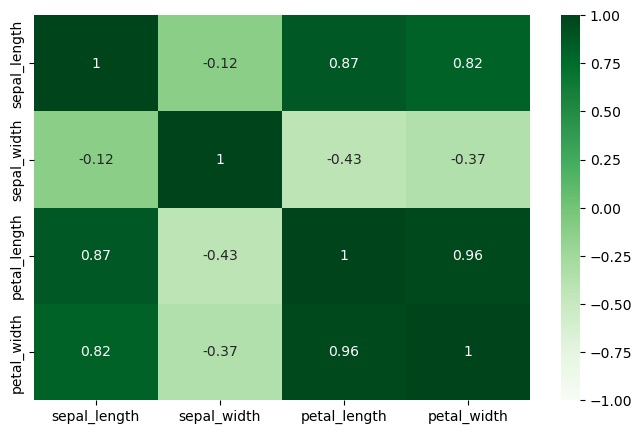

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens')
plt.show()